In [15]:
#imports
import pandas as pd


#load the dataset
dataframe = pd.read_csv("/home/queen/Desktop/python/fproject/NSE-Tata-Limited.csv", index_col = 'Date', parse_dates = True)
#explore the data
print(dataframe.head())#displays the first 5 rows by default


              Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

            Turnover (Lacs)  
Date                         
2018-10-08         10062.83  
2018-10-05          7407.06  
2018-10-04          3815.79  
2018-10-03          3960.27  
2018-10-01          3486.05  


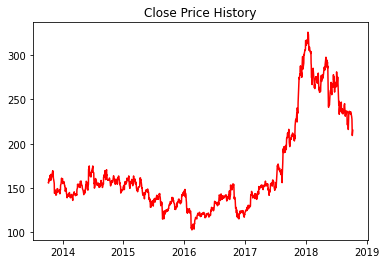

In [16]:
import matplotlib.pyplot as plt
#plot the close price history
plt.plot(dataframe['Close'], color = 'red')
plt.title("Close Price History")
plt.show()

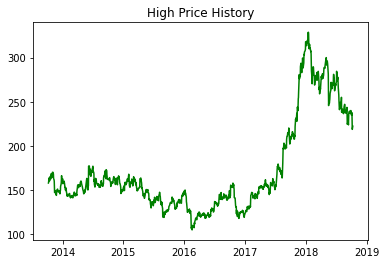

In [17]:
#plot high prices
plt.plot(dataframe['High'], color = 'green')
plt.title('High Price History')
plt.show()

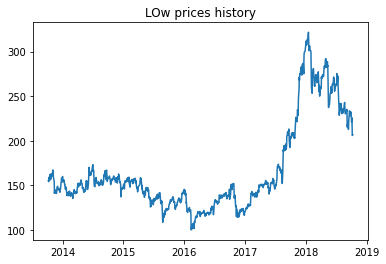

In [18]:
#plot for low prices
plt.plot(dataframe['Low'])
plt.title("LOw prices history")
plt.show()

In [19]:
import plotly.graph_objects as go
candlestick_object=go.Candlestick(x=dataframe.index,
                                 open=dataframe['Open'],
                                 high=dataframe['High'],
                                 low=dataframe['Low'],
                                 close=dataframe['Close'])
#bullish for rising prices close is high, open is low
#bearish, red or black rep falling prices, open is high and close is low
#create a plot using the candlestick object
fig = go.Figure(data=[candlestick_object])
fig.update_layout(title='Stock Prices')
fig.show()

In [20]:
#daily resamples
daily_sample = dataframe.resample('D').mean()
print(daily_sample.head())

              Open    High     Low   Last   Close  Total Trade Quantity  \
Date                                                                      
2013-10-08  157.00  157.80  155.20  155.8  155.80             1720413.0   
2013-10-09  155.70  158.20  154.15  155.3  155.55             2049580.0   
2013-10-10  156.00  160.80  155.85  160.3  160.15             3124853.0   
2013-10-11  161.15  163.45  159.00  159.8  160.05             1880046.0   
2013-10-12     NaN     NaN     NaN    NaN     NaN                   NaN   

            Turnover (Lacs)  
Date                         
2013-10-08          2688.94  
2013-10-09          3204.49  
2013-10-10          4978.80  
2013-10-11          3030.76  
2013-10-12              NaN  


In [21]:
#resampling data into weekly data
weekly_sample = dataframe.resample('W').mean()
print(weekly_sample.head())

                Open        High       Low      Last       Close  \
Date                                                               
2013-10-13  157.4625  160.062500  156.0500  157.8000  157.887500   
2013-10-20  160.7875  162.387500  158.3875  160.5375  160.925000   
2013-10-27  162.4400  165.110000  159.3900  162.0300  161.900000   
2013-11-03  164.5500  167.241667  162.8500  165.4250  165.308333   
2013-11-10  165.2000  167.412500  161.4625  163.3000  162.900000   

            Total Trade Quantity  Turnover (Lacs)  
Date                                               
2013-10-13            2193723.00        3475.7475  
2013-10-20            1923133.50        3097.4175  
2013-10-27            3087953.60        5044.3680  
2013-11-03            2052862.00        3388.2550  
2013-11-10            1844349.25        3039.1800  


In [22]:
#resampling data into monthly data
#it gives the desired time frame
monthly_sample = dataframe.resample('M').mean()
print(monthly_sample.head())

                  Open        High         Low        Last       Close  \
Date                                                                     
2013-10-31  161.205882  163.464706  159.000000  161.073529  161.141176   
2013-11-30  153.120000  155.315000  150.060000  152.352500  152.035000   
2013-12-31  150.183333  152.245238  148.592857  150.223810  150.278571   
2014-01-31  150.978261  152.743478  148.786957  150.006522  150.000000   
2014-02-28  142.092105  143.336842  140.502632  141.765789  141.692105   

            Total Trade Quantity  Turnover (Lacs)  
Date                                               
2013-10-31          2.352060e+06      3808.717647  
2013-11-30          3.076168e+06      4615.809500  
2013-12-31          2.572193e+06      3948.654286  
2014-01-31          2.220701e+06      3327.731739  
2014-02-28          1.516393e+06      2151.592105  


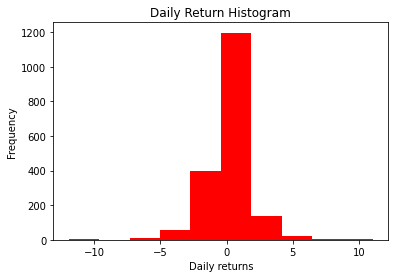

In [23]:
#return histogram od daily samples
daily_sample['daily_returns'] = daily_sample['Close'].pct_change()*100 #calculates the price returns

#plot histogram
plt.hist(daily_sample['daily_returns'], bins = 10, color ='red')
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.title('Daily Return Histogram')
plt.show()
#the high the volality the riskier the security
#majority of daily returns are between -4% and +4%, but occasionally the prices had big negative or positive 15% changes, so the stock is indeed very volatile.

In [33]:
#financial trading with bt
#bt is a framework that allows for defining and backtesting trading strategies
#four main processes a.obtain the data from a csv file b.define the strategy c, backtest the strategy d. evaluate results

#get the data
import bt
bt_data = bt.get('goog, amzn, tsla', start = '2020-6-1', end = '2020-12-1')
print(bt_data.head())#displays the adjusted close prices

                   goog         amzn        tsla
Date                                            
2020-06-01  1431.819946  2471.040039  179.619995
2020-06-02  1439.219971  2472.409912  176.311996
2020-06-03  1436.380005  2478.399902  176.591995
2020-06-04  1412.180054  2460.600098  172.876007
2020-06-05  1438.390015  2483.000000  177.132004


In [38]:
#2. define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])

In [39]:
#3.backtest the strategy using the historical data
bt_test = bt.Backtest(bt_strategy, bt_data)
#run the backtest
bt_res = bt.run(bt_test)


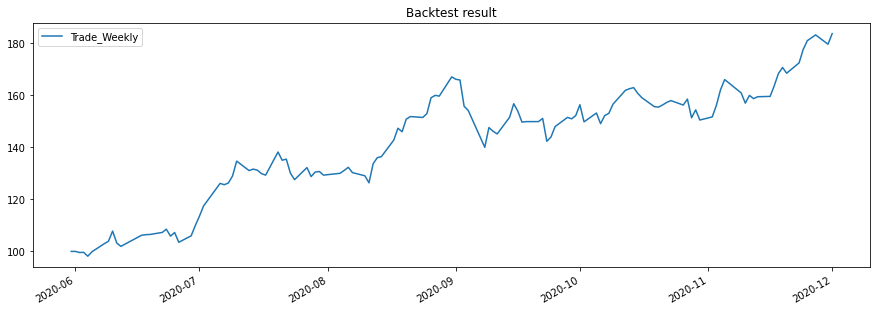

In [40]:
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()
# The test shows over a six-month period, using this strategy to trade the 
#“FAANG” stocks can increase your portfolio value over 30%. The strategy looks viable.